# Regresión Logística

Documentación en sklearn del método de [regresión logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import mlutils

Ejemplo basado en [este link](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html).

Vamos a usar la base de datos de Iris para ver la regresión logística:

In [3]:
# import some data to play with
iris = datasets.load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

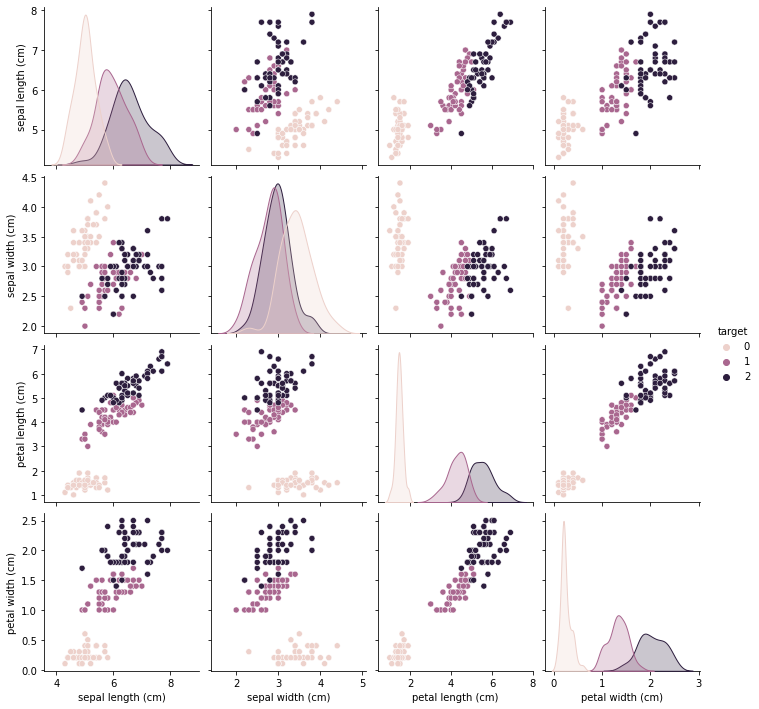

In [6]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
sns.pairplot(df,hue='target')
plt.show()

Reduzcamos la base de datos para facilitar la comprensión de lo que estamos haciendo

In [7]:
X = iris.data[:, :2]  # we only take the first two features.
# sepal length, sepal width
y = iris.target
X = X[y<2]            # we only take two classes
y = y[y<2]            # we only take two classes
# setosa y versicolor

In [8]:
def plot_decision_boundary(X, y, regression):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = regression.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

Probemos diferentes argumentos del método *LogisticRegression* para ver qué pasa...

In [9]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

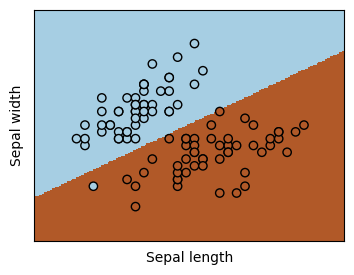

In [10]:
# create an instance of Logistic Regression Classifier
logreg = LogisticRegression(C=1e+3, solver='liblinear', max_iter=2).fit(X, y)
plot_decision_boundary(X, y, logreg)

Algo de información acerca de los [solvers](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions) o métodos de optimización que utiliza scikit-learn para encontrar un mínimo.

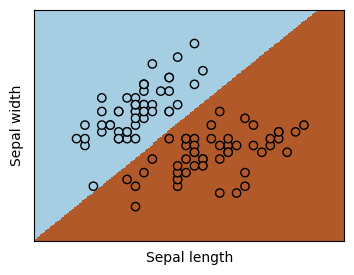

In [11]:
# update the number of iterations
logreg = LogisticRegression(C=1e+3, solver='liblinear', max_iter=20).fit(X, y)
plot_decision_boundary(X, y, logreg)

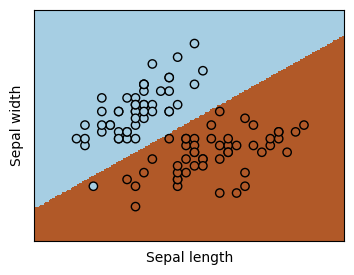

In [12]:
# update the number of iterations
logreg = LogisticRegression(C=1e+3, solver='liblinear', max_iter=20, penalty='l1').fit(X, y)
plot_decision_boundary(X, y, logreg)

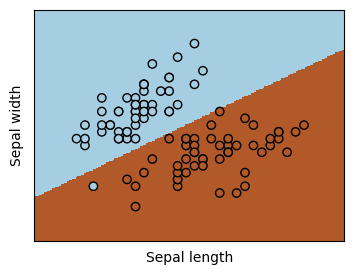

In [13]:
logreg = LogisticRegression(C=1e+8, solver='saga', max_iter=20, penalty='elasticnet',l1_ratio=0.7).fit(X, y)
plot_decision_boundary(X, y, logreg)